# KSAI Model Performance Index
By Kreecha Puphaiboon

## Objectives:
- To propose a method to evaluate AIML model against another model with variance of sample data into our consideration
- To find a benchmark of performance where we can select any dates of datasets into

# Proposed Model


$\Large\lambda=\frac{\partial B / B}{\partial N / N}=\frac{N}{B} \frac{\partial B}{\partial N}=\frac{\partial \ln B}{\partial \ln N}$

where

- <B>B</B> is the expected performance return of the based benchmark or champion set

- <B>N</B> is the performance of the new challenger set

- <B>${\partial}$</B> denote the expected performance change via partial differential equation (PDE) of problem set

<B>Aims:</B>
- The model aims to handle the fairness between 2 datasets accounting for variance between B and N in size of samples i.e. dataset total number and time period between the two sets of B and N.

- The third terms employ Log Normal Distribution to accomodate unit scale differences between two datasets. 

# Step Calculation

error in difference places where you forecast people to spend money but they spend much less, the expected performance $R$ for each elements in the set where $n$ is the number of element in the set

$$\bar{R}=\frac{\sum_{i=1}^{n} R_{i}}{n}$$

## Expected Performance
The expected performance return of each elements will be calculated by

$$E\left[r_i\right]=\mu_i$$

where $\mu_i$ is the mean of the historical data. Thus, the total expected performance for a set of places is given by

$$\sum_{i=1}^n w_i\mu_i=\mathbf{w}^T\mathbf{\mu}.$$

where $\mathbf{\mu}=\left[\mu_1,\ldots,\mu_2\right]^T$ is the vector of the expected errors and $\mathbf{w}=\left[w_1,\ldots,w_2\right]^T$ is the vector of the weights of each elements in the set we want to observe. The vector of weights, w, which necessarily sums up
to 1:


## Variance

The variance of the performance given by

$$\sigma_i^2=\textrm{Var}\left(r_i\right)=E\left[\left(r_i-\mu_i\right)^2\right]$$

and the covariance between elements $i$ and $j$ is given by

$$\sigma_{ij}=\textrm{Cov}\left(r_i,r_j\right)=E\left[\left(r_i-\mu_i\right)\left(r_j-\mu_j\right)\right].$$

Using matrix notation, the covariances can be put into a covariance matrix, $K$, such that

$$K=\left[\sigma_{ij}\right].$$

The total variance of the elements in the set is going to be

$$\sigma_P^2=E\left[\left(r_P-\mu_P\right)^2\right]=\sum_{i=1}^n\left(\sigma_iw_i\right)^2+2\sum_{i=1}^{n-1}\sum_{j=i+1}^nw_iw_j\sigma_{ij}=\mathbf{w}^TK\mathbf{w}$$



## A measurement by combining the above as the variance-adjusted performance of problem set

$$\text { X }=\frac{E(R)-R_{f}}{\sigma_{p}}$$

Now we have the expected performance and variance based ratio of the set either Base or Challenger

If we want to push futher and see the curve based on critiria such as group or segment of elements then we have to optimise

## Variance and Performance Return Problem

If we want an expected performance $r_0$, then the problem becomes,

$$
\textrm{minimize } \mathbf{w}^TK\mathbf{w}
$$
such that
$$
\mathbf{w}^T\mathbf{\mu}=r_0\\
w_i\ge0,\forall i\\
\mathbf{w}^T\mathbf{e}=1
$$

where $\mathbf{e}=\left[1,1,\ldots,\right]^T$ is a vector of all ones. The solution becomes

$$\mathbf{w}=K^{-1}\left[\begin{array}{cc}\mathbf{\mu}&\mathbf{e}\end{array}\right]A^{-1}\left[\begin{array}{c} r_0\\1\end{array}\right]$$

where $A$ is given by

$$A=\left[\begin{array}{cc}\mathbf{\mu}^TK^{-1}\mathbf{\mu}&\mathbf{\mu}^TK^{-1}\mathbf{e}\\
\mathbf{\mu}^TK^{-1}\mathbf{e}&\mathbf{e}^TK^{-1}\mathbf{e}\end{array}\right].$$

In [24]:
import pandas as pd
import numpy as np
from datetime import datetime
import scipy as sp
import scipy.stats as spstats
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# make plots inline
%matplotlib inline

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 7)

pd.set_option('precision', 2)
pd.options.display.float_format = '{:,.2f}'.format

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [25]:
def create_set(elements, weights=None):
    if weights is None: 
        shares = np.ones(len(elements))/len(elements)
    set_ = pd.DataFrame({'ELEMENT_ID': elements, 
                              'Weights': weights}, 
                             index=elements)
    return set_

def calculate_weighted_set_value(the_set, returns, name='Value'):
    total_weights = the_set.Weights.sum()
    weighted_returns = returns * (the_set.Weights / total_weights)
    return pd.DataFrame({name: weighted_returns.sum(axis=1)})

def calc_set_var(returns, weights=None):
    if weights is None: 
        weights = np.ones(returns.columns.size) / returns.columns.size
    sigma = np.cov(returns.T, ddof=0)
    var = (weights * sigma * weights.T).sum()
    return var

def the_ratio(returns, weights = None, risk_rate = 0.015):
    """ variance-adjusted performance """
    n = returns.columns.size
    if weights is None: weights = np.ones(n)/n
    # get the set variance
    var = calc_set_var(returns, weights)
    means = returns.mean()
    return (means.dot(weights) - risk_rate)/np.sqrt(var)

def plot_set_returns(returns, title=None):
    returns.plot(figsize=(12,8))
    plt.xlabel('Count Error')
    plt.ylabel('Returns')
    if title is not None: plt.title(title)
    plt.show()
    


# Example of Champion vs KSAI Sets

In [26]:
# elements and weights
champion_set = create_set(['2235', '3041', '3094', '3233'], [1, 1, 1, 1])
champion_set

     ELEMENT_ID  Weights
2235       2235        1
3041       3041        1
3094       3094        1
3233       3233        1

In [27]:
ksai_set = create_set(['4047', '4250', '5479'], [1, 1, 1])
ksai_set

     ELEMENT_ID  Weights
4047       4047        1
4250       4250        1
5479       5479        1

<B>Champion error sample</B>

In [28]:
champion_perform = pd.DataFrame(
        {'2235': [1679900, 2961600, 3200000, 2554900, 4581100],
         '3041': [5245000, 4416500, 6012400, 0, 6082800],
         '3094': [5134900, 4624300, 3476300, 5759400, 4681800],
         '3233': [4186600, 3643500, 2557900, 3348400, 4820100]
        })
champion_perform

# 6082800
champion_perform.head().style.format("{:,.0f}")

,2235,3041,3094,3233
0,"1,679,900","5,245,000","5,134,900","4,186,600"
1,"2,961,600","4,416,500","4,624,300","3,643,500"
2,"3,200,000","6,012,400","3,476,300","2,557,900"
3,"2,554,900",0,"5,759,400","3,348,400"
4,"4,581,100","6,082,800","4,681,800","4,820,100"


In [29]:
""" KSAI Sample """
ksai_perform = pd.DataFrame(
        {'4047': [3058900, 4130000, 3606400, 2732800, 4980000],
         '4250': [5053700, 3498900, 3691100, 4695800, 5080000],
         '5479': [2776200, 4066600, 4524300, 4112100, 5070000],
        })
ksai_perform.head().style.format("{:,.0f}")

,4047,4250,5479
0,"3,058,900","5,053,700","2,776,200"
1,"4,130,000","3,498,900","4,066,600"
2,"3,606,400","3,691,100","4,524,300"
3,"2,732,800","4,695,800","4,112,100"
4,"4,980,000","5,080,000","5,070,000"


In [30]:
""" Champion """
champion_wr = calculate_weighted_set_value(champion_set, champion_perform, "Value")
champion_with_value = pd.concat([champion_perform, champion_wr], axis=1)
champion_with_value.head().style.format("{:,.0f}")

,2235,3041,3094,3233,Value
0,"1,679,900","5,245,000","5,134,900","4,186,600","4,061,600"
1,"2,961,600","4,416,500","4,624,300","3,643,500","3,911,475"
2,"3,200,000","6,012,400","3,476,300","2,557,900","3,811,650"
3,"2,554,900",0,"5,759,400","3,348,400","2,915,675"
4,"4,581,100","6,082,800","4,681,800","4,820,100","5,041,450"


In [31]:
""" KSAI """
ksai_wr = calculate_weighted_set_value(ksai_set, ksai_perform, "Value")
ksai_with_value = pd.concat([ksai_perform, ksai_wr], axis=1)
ksai_with_value.head().style.format("{:,.0f}")

,4047,4250,5479,Value
0,"3,058,900","5,053,700","2,776,200","3,629,600"
1,"4,130,000","3,498,900","4,066,600","3,898,500"
2,"3,606,400","3,691,100","4,524,300","3,940,600"
3,"2,732,800","4,695,800","4,112,100","3,846,900"
4,"4,980,000","5,080,000","5,070,000","5,043,333"


In [32]:
champion_with_value.std()

2235    1,058,540.10
3041    2,524,584.51
3094      837,962.59
3233      854,688.88
Value     757,323.82
dtype: float64

In [33]:
ksai_with_value.std()

4047    891,422.02
4250    756,912.43
5479    847,666.62
Value   556,157.40
dtype: float64

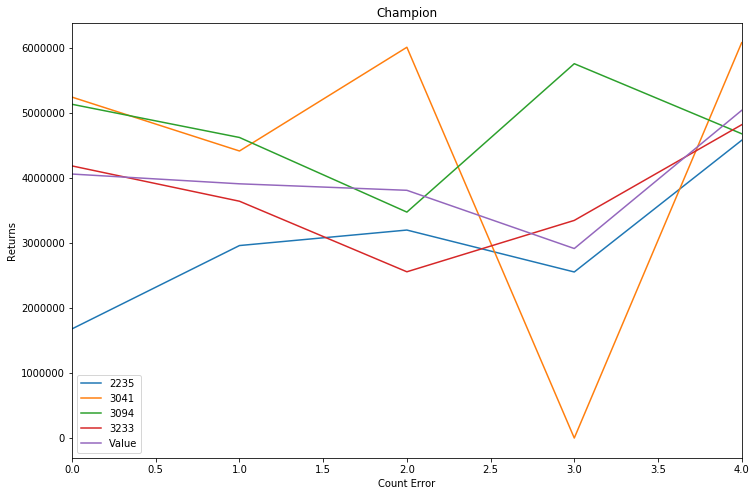

In [34]:
plot_set_returns(champion_with_value, title='Champion')

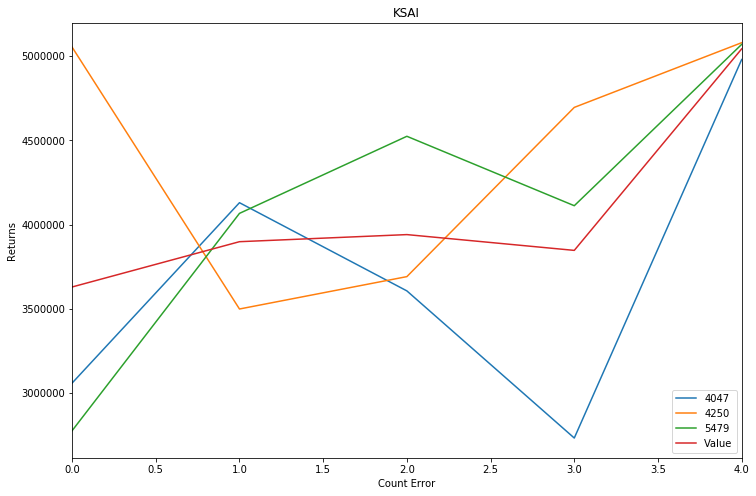

In [35]:
plot_set_returns(ksai_with_value, title='KSAI')

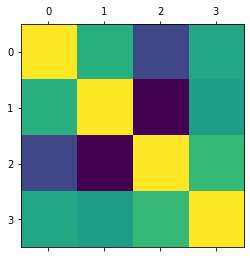

In [45]:
champion_perform.corr()
plt.matshow(champion_perform.corr())
plt.show()

In [37]:
ksai_perform.corr()
#plt.matshow(ksai_perform.corr())
#plt.show()

      4047  4250  5479
4047  1.00 -0.06  0.67
4250 -0.06  1.00 -0.18
5479  0.67 -0.18  1.00

In [38]:
print('Champion variance = {:,.2f}'.format(calc_set_var(champion_perform)))

Champion variance = 458,831,496,350.00


In [39]:
print('KSAI variance = {:,.2f}'.format(calc_set_var(ksai_perform)))

KSAI variance = 247,448,839,377.78


<B>Champion and KSAI variance-adjusted performance comparison</B>

In [40]:
""" calculate variance-adjusted performance """
champ_ratio = the_ratio(champion_perform)

In [41]:
""" calculate variance-adjusted performance """
ksai_ratio = the_ratio(ksai_perform)

In [42]:
""" Less ratio is better """
print('The champion ratio is {:,.2f} vs KSAI ratio is {:,.2f}'.format(champ_ratio, ksai_ratio))

The champion ratio is 5.83 vs KSAI ratio is 8.19


# Revolving

Let assume the baseline or the champion is accepted and time goes by, the new ratio or the add-on is the same model, therefore the devision can occur hence 

In [43]:
bay_lambda = champ_ratio/ksai_ratio
print('Bay_lambda = {:,.2f} '.format(bay_lambda))

Bay_lambda = 0.71 
